In [4]:
%matplotlib inline

import pickle
import numpy as np
from sklearn import preprocessing
import pickle
import pywt
import matplotlib.pyplot as plt

import model_fit_history as mfh

In [3]:
X_train,y_train,pvals,keys,time = mfh.load_data('transit_data_train.pkl',whiten=True)

['rp', 'per', 'inc', 'sig_tol', 'phi', 'A', 'w', 'PA', 'Pw'] [1.00000000e-01 4.00000000e+00 9.00000000e+01 4.50000000e+00
 3.14159265e+00 2.00000000e-03 1.00000000e+00 1.00000000e+02
 1.00000000e+02]


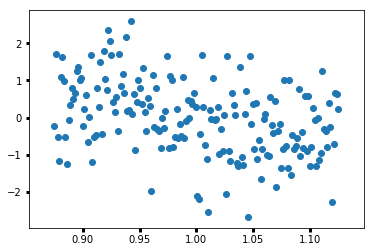

In [22]:
n = 100
plt.scatter(time, X_train[-1,:])
print(keys, pvals[-1])

In [19]:
Xc_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
print(Xc_train.shape)

(311040, 180, 1)


In [21]:
print(y_train)

[1. 1. 1. ... 0. 0. 0.]
